In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('fake_decision tree_.csv')

In [3]:
df=pd.DataFrame(data)

In [4]:
df.head(5)

,Name,Age,Job,isAdmitted,University
0,Adam Smith,28,Software Developer,1,University of California
1,Jessica Brown,35,Software Developer,0,Harvard University
2,Ryan Johnson,42,Software Developer,1,University of California
3,Rachel Lee,29,Software Developer,0,Harvard University
4,Andrew Chen,36,Software Developer,1,University of Michigan


In [5]:
df.columns


Index(['Name', 'Age', 'Job', 'isAdmitted', 'University'], dtype='object')

<AxesSubplot:ylabel='None'>

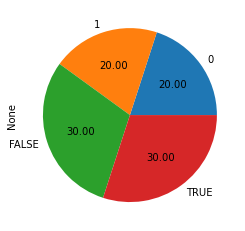

In [6]:
df.groupby('isAdmitted').size().plot(kind='pie', autopct='%.2f')

<AxesSubplot:>

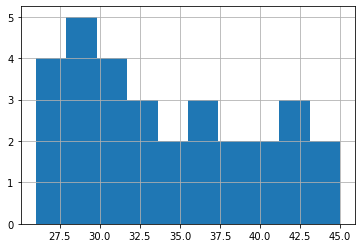

In [7]:
df['Age'].hist()

In [8]:
df=df.iloc[1:11,:]

In [9]:
col_names = ['Age','Job','University']
for col in col_names:
    print(df[col].value_counts()) 

35    1
42    1
29    1
36    1
31    1
45    1
33    1
26    1
39    1
27    1
Name: Age, dtype: int64
Software Developer            4
Human Resources Specialist    4
Software Engineer             1
Product Manager               1
Name: Job, dtype: int64
Harvard University                       3
University of California                 3
University of Michigan                   2
Massachusetts Institute of Technology    1
University of Southern California        1
Name: University, dtype: int64


In [10]:
df

,Name,Age,Job,isAdmitted,University
1,Jessica Brown,35,Software Developer,0,Harvard University
2,Ryan Johnson,42,Software Developer,1,University of California
3,Rachel Lee,29,Software Developer,0,Harvard University
4,Andrew Chen,36,Software Developer,1,University of Michigan
5,Emily Davis,31,Human Resources Specialist,0,University of California
6,Jacob Garcia,45,Human Resources Specialist,1,Harvard University
7,Olivia Wilson,33,Human Resources Specialist,0,University of Michigan
8,Michael Nguyen,26,Human Resources Specialist,1,University of California
9,Sophia Kim,39,Software Engineer,0,Massachusetts Institute of Technology
10,Daniel Hernandez,27,Product Manager,1,University of Southern California


In [11]:
df['Job']=df['Job'].map({'Software Developer':1,'Human Resources Specialist':2,'Product Manager':3}) 

In [12]:
#df['isAdmitted']=df['isAdmitted'].map({'False':0,'True':1})

In [13]:
df['University']=df['University'].map({'Harvard University':1,'University of California':2,'University of Michigan':3,
                                      'Massachusetts Institute of Technology':4,'University of Southern California':5})

In [14]:
df

,Name,Age,Job,isAdmitted,University
1,Jessica Brown,35,1.0,0,1
2,Ryan Johnson,42,1.0,1,2
3,Rachel Lee,29,1.0,0,1
4,Andrew Chen,36,1.0,1,3
5,Emily Davis,31,2.0,0,2
6,Jacob Garcia,45,2.0,1,1
7,Olivia Wilson,33,2.0,0,3
8,Michael Nguyen,26,2.0,1,2
9,Sophia Kim,39,NaN,0,4
10,Daniel Hernandez,27,3.0,1,5


In [15]:
df.dropna(inplace=True)

In [16]:
df

,Name,Age,Job,isAdmitted,University
1,Jessica Brown,35,1.0,0,1
2,Ryan Johnson,42,1.0,1,2
3,Rachel Lee,29,1.0,0,1
4,Andrew Chen,36,1.0,1,3
5,Emily Davis,31,2.0,0,2
6,Jacob Garcia,45,2.0,1,1
7,Olivia Wilson,33,2.0,0,3
8,Michael Nguyen,26,2.0,1,2
10,Daniel Hernandez,27,3.0,1,5


In [17]:
df.isnull().sum()

Name          0
Age           0
Job           0
isAdmitted    0
University    0
dtype: int64

In [18]:
y=df['isAdmitted']

In [19]:
x=df[['Job','Age','University']]

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
decisiontree = DecisionTreeClassifier()

In [22]:
model=decisiontree.fit(x,y)

In [23]:
from sklearn import tree

In [24]:
rules:str = tree.export_text(model)

In [25]:
with open('fake.txt','w')  as f:
    f.write(rules)

In [26]:
rules = rules.replace('feature_1 ','Age')
rules = rules.replace('class: 0', 'rejected')
rules = rules.replace('class: 1', 'approved')

In [27]:
from sklearn.tree import export_text

In [28]:
tree_rules = export_text(decisiontree, feature_names=list(x.columns))
tree_rules

'|--- Age <= 35.50\n|   |--- Age <= 28.00\n|   |   |--- class: 1\n|   |--- Age >  28.00\n|   |   |--- class: 0\n|--- Age >  35.50\n|   |--- class: 1\n'

In [29]:
def get_lineage(tree, feature_names):
     left      = tree.tree_.children_left
     right     = tree.tree_.children_right
     threshold = tree.tree_.threshold
     features  = [feature_names[i] for i in tree.tree_.feature]

     # get ids of child nodes
     idx = np.argwhere(left == -1)[:,0]     

     def recurse(left, right, child, lineage=None):          
          if lineage is None:
               lineage = [child]
          if child in left:
               parent = np.where(left == child)[0].item()
               split = 'l'
          else:
               parent = np.where(right == child)[0].item()
               split = 'r'

          lineage.append((parent, split, threshold[parent], features[parent]))

          if parent == 0:
               lineage.reverse()
               return lineage
          else:
               return recurse(left, right, parent, lineage)

     for child in idx:
          for node in recurse(left, right, child):
               print(node)

In [30]:
get_lineage(decisiontree, df.columns)

(0, 'l', 35.5, 'Age')
(1, 'l', 28.0, 'Age')
2
(0, 'l', 35.5, 'Age')
(1, 'r', 28.0, 'Age')
3
(0, 'r', 35.5, 'Age')
4


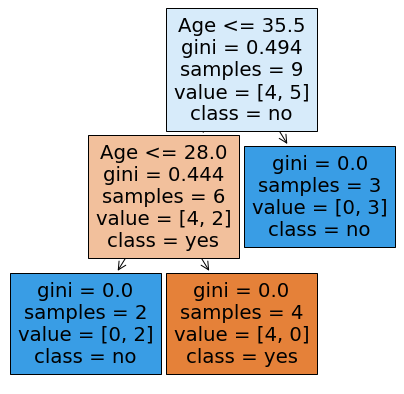

In [31]:
import matplotlib.image as pltimage
fig = plt.figure(figsize=(7,7))
tree.plot_tree(decisiontree, feature_names=['Job','Age','University'],class_names=['yes','no'],filled=True)
fig.savefig('tree.png')